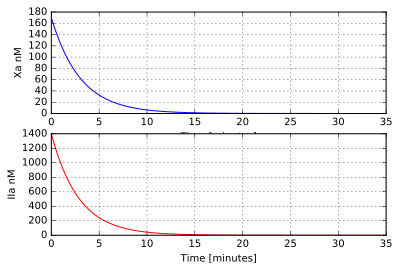

In [9]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
 
def tank(t, y):
    """
    Dynamic balance for a CSTR
 
    C_A = y[0] = the concentration of A in the tank, [mol/L]
    T   = y[1] = the tank temperature, [K]
 
    Returns dy/dt = [F/V*(C_{A,in} - C_A) - k*C_A^2       ]
                    [F/V*(T_in - T) - k*C_A^2*HR/(rho*Cp) ]
    """

 
    # Assign some variables for convenience of notation
    beta = 0.87e-9
    IXa = y[0]
    VIIIa  = y[1]
    Xa = y[2]
    Va = y[3]
    APC = y[4]
    IIa = y[5]
 
    # kinetic constants
    k1 = 15. #min^-1
    k2 = 1.4 #min^-1
    k3 = 2.3 #min^-1
    k4 = 4 #min^-1
    k5 = 221 #min^-1
    k6 = 2.5 #min^-1
    k7 = 0.5 #min^-1
    k8 = 0.87 #min^-1
    k9 = 1900 #min^-1
    
    h1 = 0.01 #min^-1
    h2 = 0.35 #min^-1
    h3 = 0.33 #min^-1
    h4 = 0.4 #min^-1
    h5 = 0.34 #min^-1
    h6 = 0.35 #min^-1
    b1 = 11
    b2 = 23 #nM
    b3 = 6.1 #nM
    b4 = 250 #nM
    
 
    # Output from ODE function must be a COLUMN vector, with n rows
    n = len(y)      # 2: implies we have two ODEs
    dydt = np.zeros((n,1))
    dydt[0] = k1 * beta - h1 * IXa
    dydt[1] = k2 * IIa + k3 * Xa - k4 * APC * VIIIa/(b1 + VIIIa) - h2 * VIIIa
    dydt[2] = k5 * IXa * VIIIa/(b2 + VIIIa) - h3 * Xa
    dydt[3] = k6 * IIa - k7 * APC * Va/(b3 + Va) - h4 * Va
    dydt[4] = k8 * IIa - h5* APC
    dydt[5] = k9 * Xa * Va/(b4 + Va) - h6 * IIa
    return dydt
 
# The ``driver`` that will integrate the ODE(s):
if __name__ == '__main__':
 
    # Start by specifying the integrator:
    # use ``vode`` with "backward differentiation formula"
    r = integrate.ode(tank).set_integrator('vode', method='bdf')
 
    # Set the time range
    t_start = 0.0
    t_final = 35.0
    delta_t = 0.001
    # Number of time steps: 1 extra for initial condition
    num_steps = np.int(np.floor((t_final - t_start)/delta_t)) + 1
 
    # Set initial condition(s): for integrating variable and time!
    IXa_zero = 90e-9 #nM
    VIIIa_zero = 0.7e-9 #nM
    Xa_zero = 170e-9 #nM
    Va_zero = 20e-9 #nM
    APC_zero = 60e-9 #nM
    IIa_zero = 1400e-9 #nM
    r.set_initial_value([IXa_zero, VIIIa_zero,Xa_zero,Va_zero,APC_zero,IIa_zero], t_start)
 
    # Additional Python step: create vectors to store trajectories
    t = np.zeros((num_steps, 1))
    IXa = np.zeros((num_steps, 1))
    VIIIa = np.zeros((num_steps, 1))
    Xa = np.zeros((num_steps, 1))
    Va = np.zeros((num_steps, 1))
    APC = np.zeros((num_steps, 1))
    IIa = np.zeros((num_steps, 1))
    t[0] = t_start
    IXa[0] = IXa_zero
    VIIIa[0] = VIIIa_zero
    Xa[0] = Xa_zero
    Va[0] = Va_zero
    APC[0] = APC_zero
    IIa[0] = IIa_zero
 
    # Integrate the ODE(s) across each delta_t timestep
    k = 1
    while r.successful() and k < num_steps:
        r.integrate(r.t + delta_t)
 
        # Store the results to plot later
        t[k] = r.t
        IXa[k] = r.y[0]
        VIIIa[k] = r.y[1]
        Xa[k] = r.y[2]
        Va[k] = r.y[3]
        APC[k] = r.y[4]
        IIa[k] = r.y[5]
        k += 1
 
    # All done!  Plot the trajectories in two separate plots:
    plt.subplot(2,1,1)
    plt.plot(t, Xa*1e9)
    plt.xlim(t_start, t_final)
    plt.xlabel('Time [minutes]')
    plt.ylabel('Xa nM')
    plt.grid('on')
 
    plt.subplot(2,1,2)
    plt.plot(t, IIa*1e9, 'r')
    plt.xlim(t_start, t_final)
    plt.xlabel('Time [minutes]')
    plt.ylabel('IIa nM')
    plt.grid('on')
    
    plt.show
 